# Ridge, Lasso and ElasticNet 

## Ridge, Lasso, and ElasticNet in Linear Regression

**Ridge Regression** adds an L2 penalty (sum of squared coefficients) to the loss function. This helps reduce model complexity and multicollinearity by shrinking coefficients, but does not set any coefficients exactly to zero.

**Lasso Regression** introduces an L1 penalty (sum of absolute coefficients) to the loss function. This can shrink some coefficients to zero, effectively performing feature selection and producing sparse models.

**ElasticNet Regression** combines both L1 and L2 penalties. It balances the benefits of Ridge and Lasso, allowing for both regularization and feature selection, and is useful when there are multiple correlated features.

Regularization helps prevent overfitting and improves generalization in linear regression models.

## What is Regularization

Getting a good accuracy score isn't always pleasant to a data scientist specially when he gets a good training accuracy along with a poor test accuracy. Though this type of model can predict the training set very well, but it can't perform well for the test as well as new dataset. This type of situation or model is called **Overfitting**. So how can we solved this problem?
<br/>

Here comes up **Regularizaton** to solve this problem. So in short, we can say that Regularizaton is the process to prevent a model to be overfitted.
<br/>

But how? Regularization can be carried out by **Ridge Regression**, **Lasso Regression** and **Elastic Net Regression**. We will try to learn how these regression work and reduce the risk of overfitting throughout this kernel.

<br/>

<img src="https://miro.medium.com/v2/resize:fit:1380/1*anNeAlOzX1Mzd8yDcBeL6g.png"/>

## 1. Ridge Regression

It's also called L2 regularization. It shrinks the coefficients by adding a penalty to the least squares.
<br/>

**Ridge Regression penalty =  lambda1  x  square of the magnitude of the coefficients**
<br/>

By shrinking the coefficients Ridge Regession reduces the model complexity and multi-collinearity. But it keeps all the variables.

## 2. Lasso Regression

It's also called L1 regularization. It shrinks the coefficients by adding a penalty to the least squares.
<br/>

**Lasso Regression penalty =  lambda2  x  |the magnitude of the coefficients|**
<br/>

By shrinking the coefficients Lasso Regession also reduces the model complexity and multi-collinearity like Ridge Regression. But in Lasso Regression, the coefficients of less important variables get multiplied by zero and removed.

## 3. Elastic Net Regression

Elastic Net is the combination of Ridge and Lasso Regression. It has both Ridge Regression penalty and Lasso Regression penalty in it's own penalty.
<br/>

**Elastic Net Regression penalty = lambda1 x square of the magnitude of the coefficients + lambda2 x |the magnitude of the coefficients|**
<br/>

When,  
lambda1 = lambda2 = 0       -     Elastic Net becomes least square parameter estimates  
lambda1 > 0 and lambda2 = 0 -     Ridge Regression  
lambda1 = 0 and lambda2 > 0 -     Lasso Regression  
lambda1  >0 and lambda2 > 0 -     Elastic Net Regression  

**Key differences**

Ridge and Lasso Regression are almost same. But the only key difference they have is **Ridge Regression doesn't remove any features** while the features with less importance is **removed by Lasso Regression**.

## Criteria to choose regularization method
<br/>

**Ridge Regression**
1. When all the features you have are important to your model  
2. When you don't want to do feature selection as well as feature removing  
<br/>

**Lasso Regression**
1. When you have too many features  
2. And you know some of them don't have any significance to your model  
3. When you want to remove the features with less importance  
<br/>

**Elastic Net Regression**
1. When you don't know whether all the features have significance or not  
2. when there are strong correlations between features

In [1]:
# import necessary librarires and modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#importing models from sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# standard scaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# load dataset from sklearn database diabetes
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
print("diabetes dataset:", diabetes)
print("diabetes dataset keys:", diabetes.keys())
print("diabetes dataset feature names:", diabetes.feature_names)


diabetes dataset: {'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  5

In [3]:
print("Description of diabetes dataset:", diabetes['DESCR'])

Description of diabetes dataset: .. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of th

In [4]:
X = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
y = pd.Series(data=diabetes.target)
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [5]:
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
dtype: float64

In [6]:
X.shape, y.shape

((442, 10), (442,))

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [8]:
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


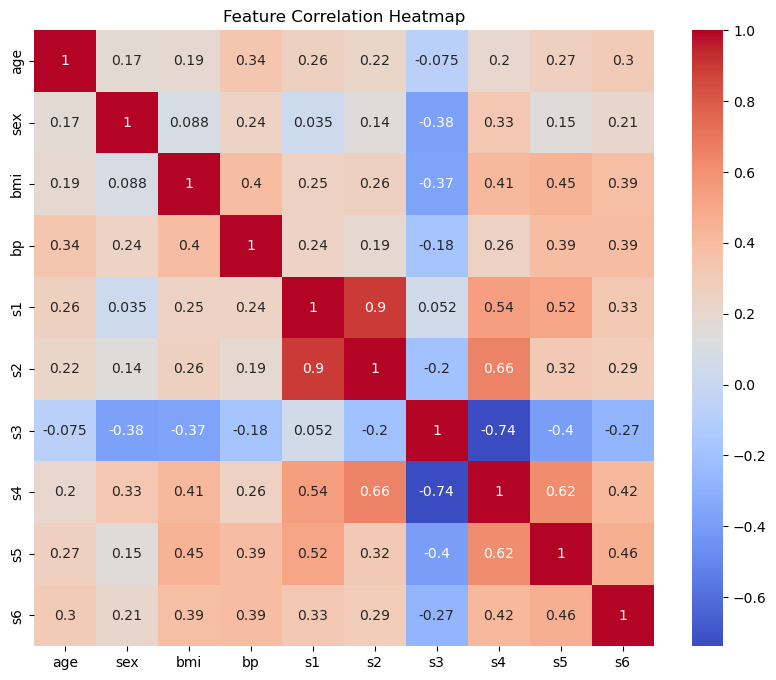

In [9]:
# see the correlation between features
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")    
plt.show()

In [10]:
# scale X fetures
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [11]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

In [12]:
# create linear regression model and train
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [13]:
# Predictions both train set and test set
y_train_pred = lin_reg.predict(X_train)
y_pred = lin_reg.predict(X_test)

In [14]:
# see how the model performed
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_pred)
print("Train MSE:", mse_train)
print("Test MSE:", mse_test)

Train MSE: 2868.5497028355776
Test MSE: 2900.193628493482


In [15]:
# see the  results metrics
print("Linear Regression Model Performance")
print("Train R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_pred))

Linear Regression Model Performance
Train R^2: 0.5279193863361498
Test R^2: 0.4526027629719195


In [16]:
# Do it ridge regression
ridge_reg = Ridge(alpha=1.0) # alpha is the regularization strength
ridge_reg.fit(X_train, y_train)
y_train_ridge_pred = ridge_reg.predict(X_train)
y_ridge_pred = ridge_reg.predict(X_test)

# see how the model performed
mse_train_ridge = mean_squared_error(y_train, y_train_ridge_pred)   
mse_test_ridge = mean_squared_error(y_test, y_ridge_pred)
print("Ridge Regression Model Performance")
print("Train MSE:", mse_train_ridge)
print("Test MSE:", mse_test_ridge)

print("Train R^2:", r2_score(y_train, y_train_ridge_pred))
print("Test R^2:", r2_score(y_test, y_ridge_pred))


Ridge Regression Model Performance
Train MSE: 2870.283249271757
Test MSE: 2892.030116179552
Train R^2: 0.5276340945510372
Test R^2: 0.454143585640167


Ridge regression was used because it helps address multicollinearity and overfitting in linear regression models. By adding an L2 penalty to the loss function, Ridge shrinks the coefficients, reducing model complexity without removing any features. This is especially useful when all features are important and we want to retain them while improving generalization and predictive performance on unseen data.

## Differences Between Linear Regression and Ridge Regression

| Aspect                | Linear Regression                          | Ridge Regression (L2 Regularization)           |
|-----------------------|--------------------------------------------|------------------------------------------------|
| **Penalty**           | No penalty term                            | Adds L2 penalty (sum of squared coefficients)  |
| **Overfitting**       | Prone to overfitting with many features    | Reduces overfitting by shrinking coefficients  |
| **Feature Selection** | Keeps all features                         | Keeps all features (no coefficients set to zero)|
| **Coefficient Size**  | Can be large if features are correlated    | Coefficients are shrunk towards zero           |
| **Use Case**          | When all features are important and data is simple | When multicollinearity exists or model complexity needs reduction |
| **Formula**           | $\min \sum (y_i - \hat{y}_i)^2$            | $\min \sum (y_i - \hat{y}_i)^2 + \lambda \sum w_j^2$ |

**User Understanding:**
- Linear Regression fits the data without any regularization, which can lead to large coefficients and overfitting.
- Ridge Regression adds a penalty to the loss function, shrinking coefficients and improving generalization, especially when features are correlated.
- Ridge does **not** remove features, but makes their impact smaller if they are less important. 

**Visual Example:**  
If you compare the coefficients from both models, you will see that Ridge Regression coefficients are generally smaller in magnitude than those from Linear Regression. This helps the model perform better on unseen data.


### Visual Example: Coefficient Comparison

Below is a plot comparing the coefficients of Linear Regression and Ridge Regression. Notice how Ridge shrinks the coefficients towards zero, but does not set any to zero.



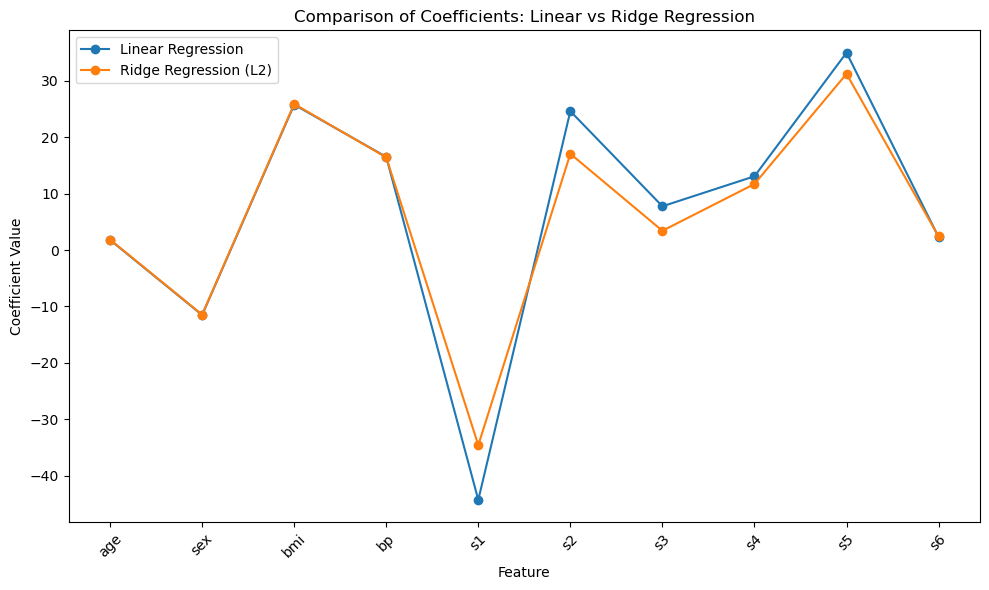

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(X.columns, lin_reg.coef_, marker='o', label='Linear Regression')
plt.plot(X.columns, ridge_reg.coef_, marker='o', label='Ridge Regression (L2)')
plt.xticks(rotation=45)
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.title('Comparison of Coefficients: Linear vs Ridge Regression')
plt.legend()
plt.tight_layout()
plt.show()

- **Observation:** Ridge coefficients are generally smaller in magnitude, which helps reduce overfitting.

--------------------

Lasso Regression Model Performance
Train MSE: 2872.791562252369
Test MSE: 2884.553106763631
Train R^2: 0.5272212985203537
Test R^2: 0.4555548342738087


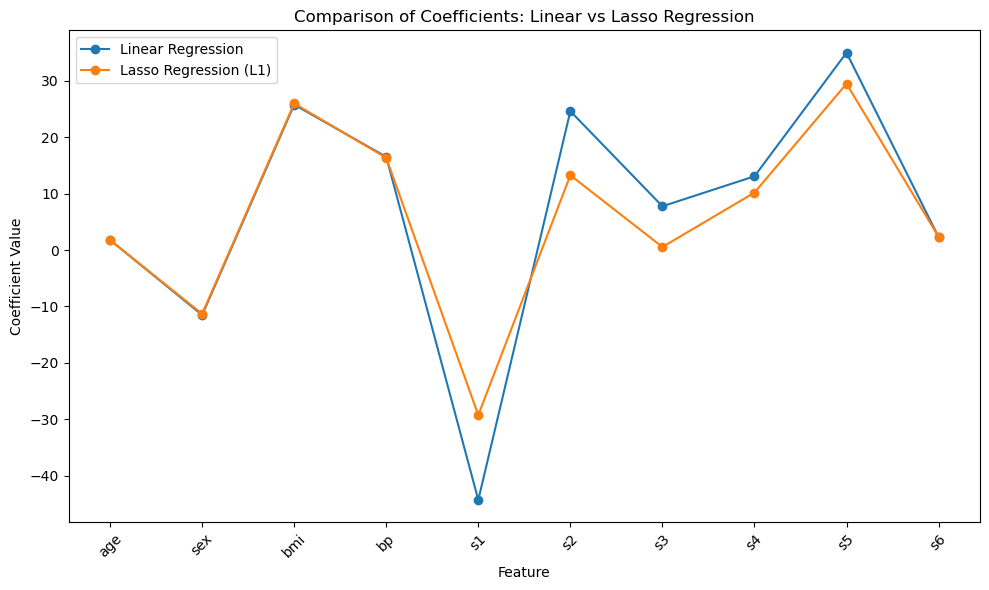

In [18]:
#Use Lasso regression
lasso_reg = Lasso(alpha=0.1) # alpha is the regularization strength
lasso_reg.fit(X_train, y_train)

y_train_lasso_pred = lasso_reg.predict(X_train)
y_lasso_pred = lasso_reg.predict(X_test)

# see how the model performed
mse_train_lasso = mean_squared_error(y_train, y_train_lasso_pred)
mse_test_lasso = mean_squared_error(y_test, y_lasso_pred)
print("Lasso Regression Model Performance")
print("Train MSE:", mse_train_lasso)
print("Test MSE:", mse_test_lasso)

print("Train R^2:", r2_score(y_train, y_train_lasso_pred))
print("Test R^2:", r2_score(y_test, y_lasso_pred))

# Visual Example: Coefficient Comparison
plt.figure(figsize=(10, 6))
plt.plot(X.columns, lin_reg.coef_, marker='o', label='Linear Regression')
plt.plot(X.columns, lasso_reg.coef_, marker='o', label='Lasso Regression (L1)')
plt.xticks(rotation=45)
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.title('Comparison of Coefficients: Linear vs Lasso Regression')
plt.legend()
plt.tight_layout()
plt.show()


In [19]:
# find which features were eliminated by Lasso
lasso_coefficients = pd.Series(lasso_reg.coef_, index=X.columns)
eliminated_features = lasso_coefficients[lasso_coefficients == 0].index.tolist()    
print("Features eliminated by Lasso Regression:", eliminated_features)


Features eliminated by Lasso Regression: []


Elastic Net Regression Model Performance
Train MSE: 2894.5598815502685
Test MSE: 2866.197078803244
Train R^2: 0.5236388604951647
Test R^2: 0.4590194439776599


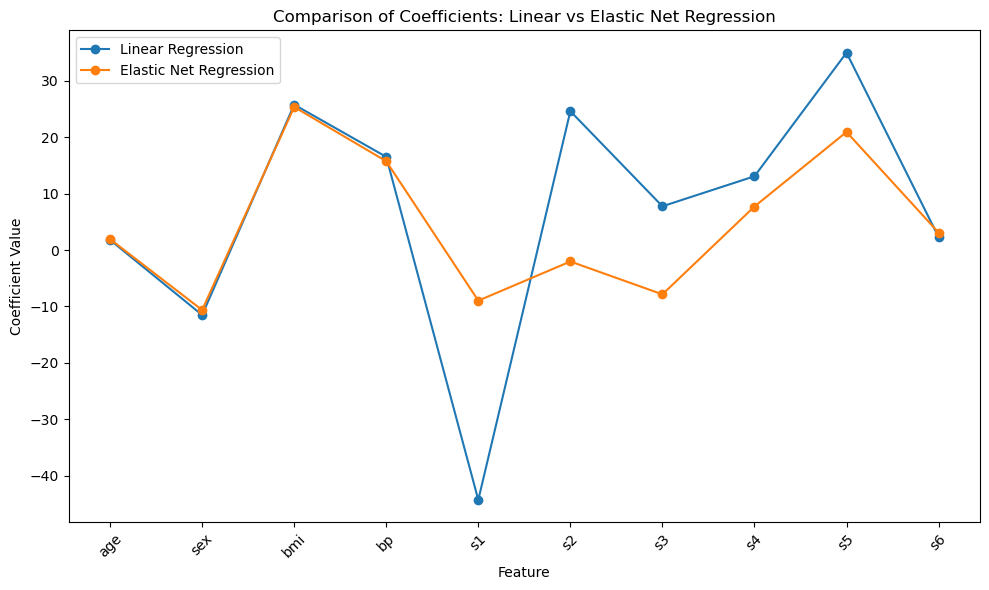

In [20]:
# Elastic Net Regression
elastic_net_reg = ElasticNet(alpha=0.1, l1_ratio=0.5) # alpha is the regularization strength, l1_ratio balances L1 and L2
elastic_net_reg.fit(X_train, y_train)
y_train_enet_pred = elastic_net_reg.predict(X_train)
y_enet_pred = elastic_net_reg.predict(X_test)
# see how the model performed
mse_train_enet = mean_squared_error(y_train, y_train_enet_pred)
mse_test_enet = mean_squared_error(y_test, y_enet_pred)
print("Elastic Net Regression Model Performance")
print("Train MSE:", mse_train_enet)
print("Test MSE:", mse_test_enet)
print("Train R^2:", r2_score(y_train, y_train_enet_pred))
print("Test R^2:", r2_score(y_test, y_enet_pred))

# Visual Example: Coefficient Comparison
plt.figure(figsize=(10, 6))
plt.plot(X.columns, lin_reg.coef_, marker='o', label='Linear Regression')
plt.plot(X.columns, elastic_net_reg.coef_, marker='o', label='Elastic Net Regression')
plt.xticks(rotation=45)
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.title('Comparison of Coefficients: Linear vs Elastic Net Regression')
plt.legend()
plt.tight_layout()
plt.show()

In [21]:
# show which features were eliminated by Elastic Net
enet_coefficients = pd.Series(elastic_net_reg.coef_, index=X.columns)
eliminated_enet_features = enet_coefficients[enet_coefficients == 0].index.tolist()
print("Features eliminated by Elastic Net Regression:", eliminated_enet_features)

Features eliminated by Elastic Net Regression: []


## Pipeline, GridSearchCV, and Cross Validation Explained

### Pipeline
A **Pipeline** in scikit-learn is a way to streamline a sequence of data processing steps and modeling into a single object. It allows you to chain together preprocessing (like scaling) and model fitting, ensuring that all steps are applied consistently during training and prediction.

**Example:**
```python
Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge())
])
```
This pipeline first scales the data, then fits a Ridge regression model.

### GridSearchCV
**GridSearchCV** is a tool for hyperparameter tuning. It exhaustively searches over specified parameter values for an estimator (like Ridge, Lasso, or ElasticNet) using cross-validation. It helps find the best combination of parameters that maximize model performance.

**Example:**
```python
GridSearchCV(ridge_pipeline, {'model__alpha': [0.1, 1.0, 10.0]}, cv=5)
```
This searches for the best `alpha` value for Ridge regression using 5-fold cross-validation.

### Cross Validation
**Cross-validation** is a technique to assess how well a model generalizes to unseen data. The most common form is k-fold cross-validation, where the dataset is split into k subsets (folds). The model is trained on k-1 folds and tested on the remaining fold, repeating this process k times. The average performance across all folds gives a robust estimate of model accuracy.

**Benefits:**
- Reduces risk of overfitting
- Provides a more reliable estimate of model performance

**Summary Table:**

| Concept         | Purpose                                      | Benefit                              |
|-----------------|----------------------------------------------|--------------------------------------|
| Pipeline        | Chain preprocessing and modeling steps        | Clean, reproducible workflows        |
| GridSearchCV    | Hyperparameter tuning with cross-validation   | Finds best model parameters          |
| Cross Validation| Assess model generalization                   | Reliable performance estimation      |

These tools are essential for building robust and reproducible machine learning workflows.

In [22]:
# Do it with sklearn Pipeline all models Ridge, Lasso and Elastic Net
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV  
 

# Create a pipeline for each model
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge())
])

lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso())
])

elastic_net_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', ElasticNet())
])

# Define parameter grids for each model
ridge_param_grid = {
    'model__alpha': [0.1, 1.0, 10.0]
}

lasso_param_grid = {
    'model__alpha': [0.1, 1.0, 10.0]
}

elastic_net_param_grid = {
    'model__alpha': [0.1, 1.0, 10.0],
    'model__l1_ratio': [0.1, 0.5, 0.9]
}

# Perform grid search for each model
ridge_grid_search = GridSearchCV(ridge_pipeline, ridge_param_grid, cv=5)
lasso_grid_search = GridSearchCV(lasso_pipeline, lasso_param_grid, cv=5)
elastic_net_grid_search = GridSearchCV(elastic_net_pipeline, elastic_net_param_grid, cv=5)

# Fit the models
ridge_grid_search.fit(X_train, y_train)
lasso_grid_search.fit(X_train, y_train)
elastic_net_grid_search.fit(X_train, y_train)

# Get the best models
best_ridge_model = ridge_grid_search.best_estimator_
best_lasso_model = lasso_grid_search.best_estimator_
best_elastic_net_model = elastic_net_grid_search.best_estimator_

# Evaluate the best models
y_ridge_best_pred = best_ridge_model.predict(X_test)
y_lasso_best_pred = best_lasso_model.predict(X_test)
y_enet_best_pred = best_elastic_net_model.predict(X_test)

# Calculate and print MSE and R^2 for each model
print("Best Ridge Regression Model Performance")
print("Test MSE:", mean_squared_error(y_test, y_ridge_best_pred))
print("Test R^2:", r2_score(y_test, y_ridge_best_pred))

print("Best Lasso Regression Model Performance")
print("Test MSE:", mean_squared_error(y_test, y_lasso_best_pred))
print("Test R^2:", r2_score(y_test, y_lasso_best_pred))

print("Best Elastic Net Regression Model Performance")
print("Test MSE:", mean_squared_error(y_test, y_enet_best_pred))
print("Test R^2:", r2_score(y_test, y_enet_best_pred))





Best Ridge Regression Model Performance
Test MSE: 2875.7787184218428
Test R^2: 0.4572109567780849
Best Lasso Regression Model Performance
Test MSE: 2824.568094049959
Test R^2: 0.46687670944102466
Best Elastic Net Regression Model Performance
Test MSE: 2860.94845093721
Test R^2: 0.4600100965892058
